# Prodaja stanovanj v Ljubljani

Projekt pri predmetu Programiranje 1, v katerem sem analizirala stanovanja, ki se trenutno prodajajo v Ljubljani.

## Priprava

Iz spletne strani http://www.nepremicnine.net sem dne 7.1.2017 pobrala podatke iz oglasov stanovanj, ki so se tistega dne še prodajala v Ljubljani. Podatke sem pobrala glede na predel Ljubljane v katerem se stanovanje nahaja in jih spravila v CSV datoteko.

In [1]:
import pandas as pd
import numpy as np

pd.options.display.max_rows = 10

stanovanja = pd.read_csv('csv-datotekeP/stanovanja.csv', index_col='id')
bezigrad = pd.read_csv('csv-datotekeP/bezigrad.csv', index_col='id').drop('podrocje', axis=1)
center = pd.read_csv('csv-datotekeP/center.csv', index_col='id').drop('podrocje', axis=1)
mostePolje = pd.read_csv('csv-datotekeP/mostePolje.csv', index_col='id').drop('podrocje', axis=1)
siska = pd.read_csv('csv-datotekeP/siska.csv', index_col='id').drop('podrocje', axis=1)
vicRudnik = pd.read_csv('csv-datotekeP/vicRudnik.csv', index_col='id').drop('podrocje', axis=1)
tipi = pd.read_csv('csv-datotekeP/tipi.csv', index_col='id')

In [2]:
%matplotlib inline

In [3]:
stanovanja = stanovanja.loc[(stanovanja['posredovanje'] == 'Prodaja') & (stanovanja['tip1'] == 'Stanovanje')].drop_duplicates()
bezigrad = bezigrad.loc[(bezigrad['posredovanje'] == 'Prodaja') & (bezigrad['tip1'] == 'Stanovanje')].drop_duplicates()
center = center.loc[(center['posredovanje'] == 'Prodaja') & (center['tip1'] == 'Stanovanje')].drop_duplicates()
mostePolje = mostePolje.loc[(mostePolje['posredovanje'] == 'Prodaja') & (mostePolje['tip1'] == 'Stanovanje')].drop_duplicates()
vicRudnik = vicRudnik.loc[(vicRudnik['posredovanje'] == 'Prodaja') & (vicRudnik['tip1'] == 'Stanovanje')].drop_duplicates()
siska = siska.loc[(siska['posredovanje'] == 'Prodaja') & (siska['tip1'] == 'Stanovanje')].drop_duplicates()
tipi = tipi.loc[(tipi['tip'] == 'soba') | (tipi['tip'] == 'garsonjera') |
                (tipi['tip'] == '1-sobno') | (tipi['tip'] == '1,5-sobno') |
                (tipi['tip'] == '2-sobno') | (tipi['tip'] == '2,5-sobno') |
                (tipi['tip'] == '3-sobno') | (tipi['tip'] == '3,5-sobno') |
                (tipi['tip'] == '4-sobno') | (tipi['tip'] == '4,5-sobno') |
                (tipi['tip'] == '5 in večsobno')]

## Analiza

Pri analizi me bo zanimalo predvsem naslednje:
    * povprečna cena m^2 v posameznem predelu
    * kje se prodaja največ stanovanj
    * spreminjanje cen glede na različne faktorje
    * v katerem predelu Ljubljane lahko najdemo stanovanje katerega cena je najbolj primerna glede na ostale faktorje

### Povprečna cena m^2

Najprej poglejmo povprečno ceno stanovanja v Ljubljani.

In [4]:
stanovanja.mean()

leto          1972.453441
velikost        87.695182
cena        235147.941113
dtype: float64

Sestavimo tabelo, ki bo prikazovala povprecja po predelih Ljubljane.

In [5]:
prvi = ['Bezigrad', 'Center', 'Moste-Polje', 'Siska','Vic-Rudnik']
leta = [bezigrad['leto'].mean(), center['leto'].mean(), mostePolje['leto'].mean(), siska['leto'].mean(), vicRudnik['leto'].mean()]
velikosti = [bezigrad['velikost'].mean(), center['velikost'].mean(), mostePolje['velikost'].mean(), siska['velikost'].mean(), vicRudnik['velikost'].mean()]
cene = [bezigrad['cena'].mean(), center['cena'].mean(), mostePolje['cena'].mean(), siska['cena'].mean(), vicRudnik['cena'].mean()]
stevila = [bezigrad['ime'].count(),center['ime'].count(), mostePolje['ime'].count(), siska['ime'].count(), vicRudnik['ime'].count()]
povprecja = pd.DataFrame({
        'leto':pd.Series(leta, index=prvi),
        'velikost':pd.Series(velikosti, index=prvi),
        'cena':pd.Series(cene, index=prvi),
        'stevilo stanovanj':pd.Series(stevila, index=prvi)
    })

In [6]:
povprecja

,cena,leto,stevilo stanovanj,velikost
Bezigrad,277861.000296,1996.449704,169,94.506686
Center,327814.881720,1914.032258,93,117.443011
Moste-Polje,136814.454615,1968.673077,52,64.064423
Siska,179614.913211,1981.889908,109,75.368716
Vic-Rudnik,169372.009577,1980.140845,71,68.747183


Izračunamo povprečno ceno na m^2 po predelih Ljubljane.

In [7]:
povprecja['cena']/povprecja['velikost']

Bezigrad       2940.120016
Center         2791.267693
Moste-Polje    2135.576160
Siska          2383.149451
Vic-Rudnik     2463.693812
dtype: float64

In [8]:
# dodamo stolpec cena na m^2 v stanovanja
stanovanja['cena/velikost'] = pd.Series(stanovanja['cena']/stanovanja['velikost'], index=stanovanja.index)
bezigrad['cena/velikost'] = pd.Series(bezigrad['cena']/bezigrad['velikost'], index=bezigrad.index)
center['cena/velikost'] = pd.Series(center['cena']/center['velikost'], index=center.index)
mostePolje['cena/velikost'] = pd.Series(mostePolje['cena']/mostePolje['velikost'], index=mostePolje.index)
siska['cena/velikost'] = pd.Series(siska['cena']/siska['velikost'], index=siska.index)
vicRudnik['cena/velikost'] = pd.Series(vicRudnik['cena']/vicRudnik['velikost'], index=vicRudnik.index)

In [9]:
stanovanja.mean()

leto               1972.453441
velikost             87.695182
cena             235147.941113
cena/velikost      2672.486487
dtype: float64

Vidimo lahko, da se najdražja stanovanja glede na kvadraturo nahajajo v Bežigradu in v Centru, najcenejša pa v Mostah in Polju. Se pa na Bežigradu tudi prodaja največ stanovanj, ki so bila zgrajena v kasnejših letih, tako da rezultat ni tako presenetljiv.

### Prodaja glede na predel Ljubljane

In [10]:
stanovanja['podrocje'].value_counts()

Bezigrad       169
Siska          109
Center          93
Vic-Rudnik      71
Moste-Polje     52
dtype: int64

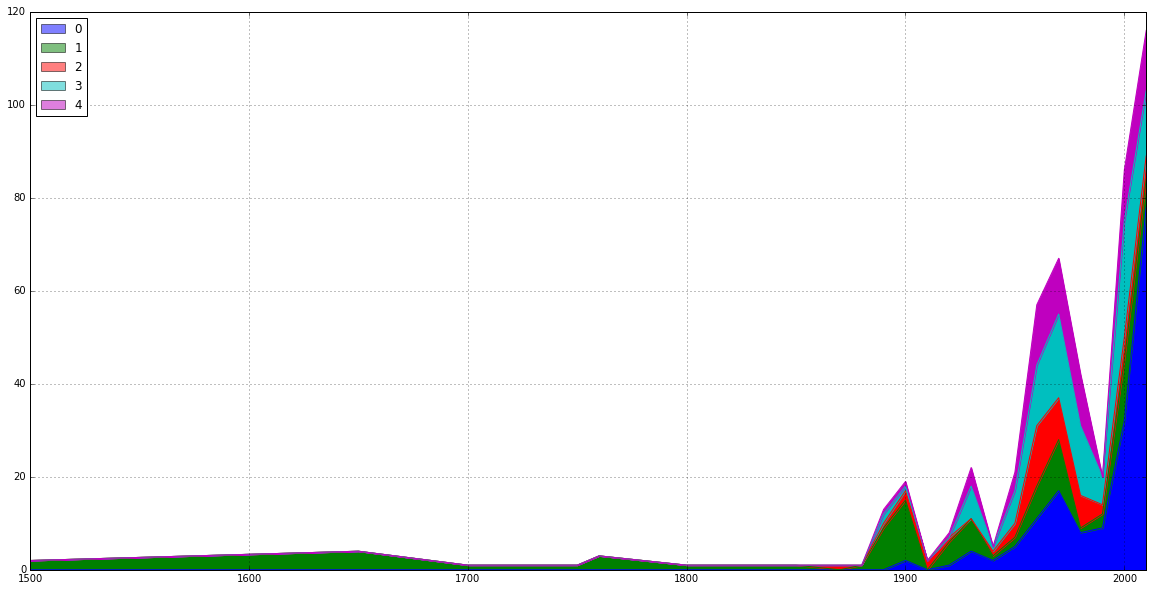

In [11]:
#graf, ki prikazuje razmerje števila stanovanj po letih izgradnje (v desetletjih) po predelu Ljubljane
pd.concat([(10*(bezigrad['leto']//10)).value_counts(),
           (10*(center['leto']//10)).value_counts(),
           (10*(mostePolje['leto']//10)).value_counts(),
           (10*(siska['leto']//10)).value_counts(),
           (10*(vicRudnik['leto']//10)).value_counts()], axis=1).plot(kind='area',figsize=(20,10))

Spodni graf prikazuje leto izgradnje stanovanj, ki se trenutno prodajajo. Vidimo, da so izgradnja nekaterih, predvsem se ta nahajajo v centru, sega tudi v leto 1500. Ta stanovanja so bila gotovo prenovljena vsaj enkrat v zadnjih nekaj desetletjih, vendar pa tega podatka nisem pobirala za stanovanja.

In [12]:
stanovanja['leto'].min()

1500

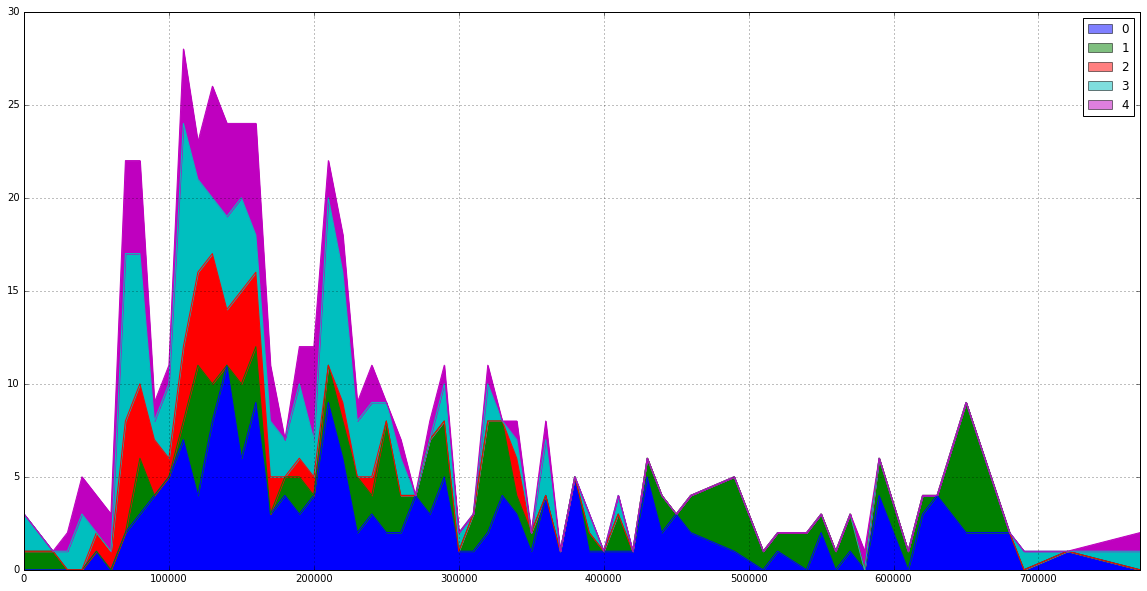

In [13]:
#graf, ki prikazuje število stanovanj v odvisnosti od cen (zaokrožena na 10 000) po predelu Ljubljane, v katerem se nahaja
pd.concat([(10000*(bezigrad['cena']//10000)).value_counts(),
           (10000*(center['cena']//10000)).value_counts(),
           (10000*(mostePolje['cena']//10000)).value_counts(),
           (10000*(siska['cena']//10000)).value_counts(),
           (10000*(vicRudnik['cena']//10000)).value_counts()], axis=1).plot(kind='area',figsize=(20,10))

Večinoma se cene gibljejo med 100 000 in 200 000. Zanimivo je tudi to, da se ta stanovanja večinoma nahajajo na Bežigradu, kjer je pa povprečna cena na m^2 najvišja. Dražja stanovanja se nahajajo v centru, kar pa ni tako presenetljivo. 

In [14]:
stanovanja_tipi = stanovanja.join(tipi, on=None)
stanovanja_tipi = stanovanja_tipi.dropna().drop_duplicates()
stanovanja_tipi.loc[(stanovanja_tipi['cena'] == stanovanja_tipi['cena'].max()) | (stanovanja_tipi['cena'] == stanovanja_tipi['cena'].min())] 

,ime,podrocje,nadstropje,leto,velikost,cena,posredovanje,tip1,cena/velikost,tip
id,,,,,,,,,,
5788908,FUŽINE,Siska,2,1988,32.00,300.00,Prodaja,Stanovanje,9.375000,1-sobno
6067839,LJ. ŠIŠKA,Siska,4,2018,217.43,778643.59,Prodaja,Stanovanje,3581.123074,5 in večsobno
6067839,LJ. ŠIŠKA,Vic-Rudnik,4,2018,217.43,778643.59,Prodaja,Stanovanje,3581.123074,5 in večsobno


In [15]:
tipi.loc[stanovanja_tipi['cena'].idxmax()]

,tip
id,
6067839,5 in večsobno
6067839,5 in večsobno


In [16]:
tipi.loc[stanovanja_tipi['cena'].idxmin()]

tip    1-sobno
Name: 5788908, dtype: object

### Spreminjanje cen

In [17]:
soba = stanovanja_tipi.loc[stanovanja_tipi['tip'] == 'soba']
garsonjere = stanovanja_tipi.loc[stanovanja_tipi['tip'] == 'garsonjera']
sobno1 = stanovanja_tipi.loc[stanovanja_tipi['tip'] == '1-sobno']
sobno15 = stanovanja_tipi.loc[stanovanja_tipi['tip'] == '1,5-sobno']
sobno2 = stanovanja_tipi.loc[stanovanja_tipi['tip'] == '2-sobno']
sobno25 = stanovanja_tipi.loc[stanovanja_tipi['tip'] == '2,5-sobno']
sobno3 = stanovanja_tipi.loc[stanovanja_tipi['tip'] == '3-sobno']
sobno35 = stanovanja_tipi.loc[stanovanja_tipi['tip'] == '3,5-sobno']
sobno4 = stanovanja_tipi.loc[stanovanja_tipi['tip'] == '4-sobno']
sobno45 = stanovanja_tipi.loc[stanovanja_tipi['tip'] == '4,5-sobno']
sobno5 = stanovanja_tipi.loc[stanovanja_tipi['tip'] == '5 in večsobno']

In [18]:
# tabela cena/velikost po tipih
prvi = ['soba', 'garsonjere', '1-sobno', '1,5-sobno', '2-sobno', '2,5-sobno', '3-sobno', '3,5-sobno', '4-sobno', '4,5-sobno', '5 in večsobno']
leta = [soba['leto'].mean(), garsonjere['leto'].mean(), sobno1['leto'].mean(), sobno15['leto'].mean(), sobno2['leto'].mean(), sobno25['leto'].mean(), sobno3['leto'].mean(), sobno35['leto'].mean(), sobno4['leto'].mean(), sobno45['leto'].mean(), sobno5['leto'].mean()]
velikosti = [soba['velikost'].mean(), garsonjere['velikost'].mean(), sobno1['velikost'].mean(), sobno15['velikost'].mean(), sobno2['velikost'].mean(), sobno25['velikost'].mean(), sobno3['velikost'].mean(), sobno35['velikost'].mean(), sobno4['velikost'].mean(), sobno45['velikost'].mean(), sobno5['velikost'].mean()]
cene = [soba['cena'].mean(), garsonjere['cena'].mean(), sobno1['cena'].mean(), sobno15['cena'].mean(), sobno2['cena'].mean(), sobno25['cena'].mean(), sobno3['cena'].mean(), sobno35['cena'].mean(), sobno4['cena'].mean(), sobno45['cena'].mean(), sobno5['cena'].mean()]
stevila = [soba['ime'].count(),garsonjere['ime'].count(), sobno1['ime'].count(), sobno15['ime'].count(), sobno2['ime'].count(), sobno25['ime'].count(), sobno3['ime'].count(), sobno35['ime'].count(), sobno4['ime'].count(), sobno45['ime'].count(), sobno5['ime'].count()]
povprecja_tipi = pd.DataFrame({
        'leto':pd.Series(leta, index=prvi),
        'velikost':pd.Series(velikosti, index=prvi),
        'cena':pd.Series(cene, index=prvi),
        'stevilo stanovanj':pd.Series(stevila, index=prvi)
    })


def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')
    
print_full(povprecja_tipi['cena']/povprecja_tipi['velikost'])

soba             2421.487603
garsonjere       2559.244774
1-sobno          2521.048130
1,5-sobno        2244.280701
2-sobno          2463.111636
2,5-sobno        2210.944552
3-sobno          2772.797161
3,5-sobno        2568.981201
4-sobno          2968.836144
4,5-sobno        3087.569870
5 in večsobno    2597.944142
dtype: float64


In [19]:
print_full(povprecja_tipi)

                        cena         leto  stevilo stanovanj    velikost
soba            97666.666667  1957.666667                  3   40.333333
garsonjere      85200.748409  1981.659091                 44   33.291364
1-sobno        106624.764706  1975.352941                 34   42.293824
1,5-sobno      107588.176471  1968.352941                 17   47.938824
2-sobno        166570.175591  1969.247312                 93   67.625914
2,5-sobno      145328.333333  1962.233333                 30   65.731333
3-sobno        254312.824812  1976.248120                133   91.717068
3,5-sobno      282416.666667  1954.750000                 12  109.933333
4-sobno        354139.000233  1980.406977                 86  119.285465
4,5-sobno      386666.666667  1995.333333                  3  125.233333
5 in večsobno  474959.968529  1954.264706                 34  182.821471


Vidimo lahko povprečne cene glede na tip stanovanja, ki nas zanima. Večsobno kot je stanovanje, dražje je.
Pogledamo si lahko še, kako se cene spreminjajo z naraščanjem leta izgradnje.

In [20]:
stanovanja['leto'].min(), stanovanja['leto'].max()

(1500, 2018)

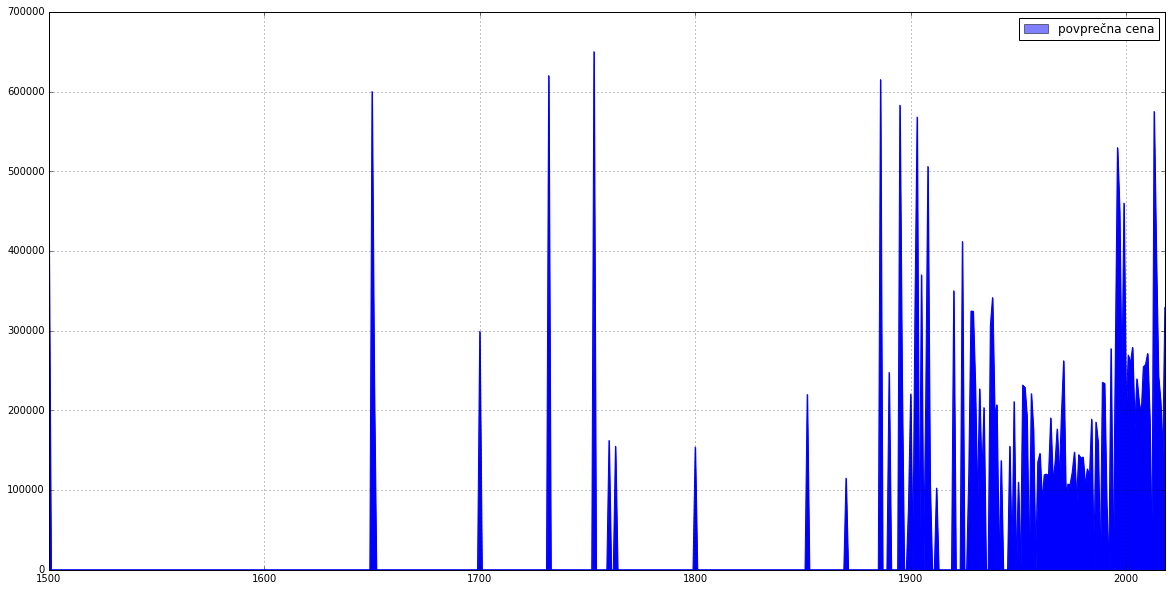

In [21]:
def povp_cena_na_leto(df):
    povp_cene = []
    leta = []
    for i in range(1500,2019):
        a = ''.join(['l', str(2015)])
        a = df.loc[df['leto'] == i]
        povp_cene.append(a['cena'].mean())
        leta.append(i)
    df1 = pd.DataFrame({'povprečna cena': pd.Series(povp_cene, index=leta)})
    return df1
    
povp_cena_na_leto(stanovanja).plot(kind='area',figsize=(20,10))

### Najbolj optimalno stanovanje

V tem razdelku nas bo zanimalo, koliko približno bi zapravili za stanovanje v posameznem predelu Ljubljane glede na kvadraturo. Gledali pa bomo na to ali kupujemo stanovanje zase(v poštev pridejo garsonjere in 1-sobna stanovanja), za dva(1,5- ali 2-sobna stanovanja) ali stanovanje kupuje družina(3- ali večsobno stanovanje).

#### Bežigrad

In [23]:
bezigrad_tipi = bezigrad.join(tipi, on=None)
b_1 = bezigrad_tipi.loc[(bezigrad_tipi['tip'] == 'garsonjera') | (bezigrad_tipi['tip'] == '1-sobno')]
b_2 = bezigrad_tipi.loc[(bezigrad_tipi['tip'] == '1,5-sobno') | (bezigrad_tipi['tip'] == '2-sobno')]
b_3 = bezigrad_tipi.loc[(bezigrad_tipi['tip'] == '2,5-sobno') | (bezigrad_tipi['tip'] == '3-sobno') |
                        (bezigrad_tipi['tip'] == '3,5-sobno') | (bezigrad_tipi['tip'] == '4-sobno') |
                        (bezigrad_tipi['tip'] == '4,5-sobno') | (bezigrad_tipi['tip'] == '5 in večsobno')]

In [24]:
prvi = ['b_1', 'b_2', 'b_3', 'garsonjera', '1-sobno', '1,5-sobno', '2-sobno', '2,5-sobno', '3-sobno', '3,5-sobno', '4-sobno', '4,5-sobno', '5 in večsobno']
min = [b_1['cena/velikost'].min(), b_2['cena/velikost'].min(), b_3['cena/velikost'].min()]
max = [b_1['cena/velikost'].max(), b_2['cena/velikost'].max(), b_3['cena/velikost'].max()]
povprecje = [b_1['cena/velikost'].mean(), b_2['cena/velikost'].mean(), b_3['cena/velikost'].mean()]
for tip in prvi[3:]:
    min.append(bezigrad_tipi.loc[bezigrad_tipi['tip'] == tip]['cena/velikost'].min())
    max.append(bezigrad_tipi.loc[bezigrad_tipi['tip'] == tip]['cena/velikost'].max())
    povprecje.append(bezigrad_tipi.loc[bezigrad_tipi['tip'] == tip]['cena/velikost'].mean())
bez = pd.DataFrame({'min': pd.Series(min, index=prvi),
                    'povprecje': pd.Series(povprecje, index=prvi),
                   'max': pd.Series(max, index=prvi)})
bez

,max,min,povprecje
b_1,3668.895717,1822.503962,2662.080504
b_2,3645.911478,1029.023747,2660.284144
b_3,5714.309540,1141.618497,2979.514497
garsonjera,3668.895717,1822.503962,2957.640494
1-sobno,2795.918367,2119.047619,2455.188511
"1,5-sobno",3333.333333,1686.746988,2674.560197
2-sobno,3645.911478,1029.023747,2656.838200
"2,5-sobno",2985.714286,1141.618497,1877.715002
3-sobno,5170.789164,1851.851852,3095.796627
"3,5-sobno",3461.538462,3461.538462,3461.538462


#### Center

In [25]:
center_tipi = center.join(tipi, on=None)
c_1 = center_tipi.loc[(center_tipi['tip'] == 'garsonjera') | (center_tipi['tip'] == '1-sobno')]
c_2 = center_tipi.loc[(center_tipi['tip'] == '1,5-sobno') | (center_tipi['tip'] == '2-sobno')]
c_3 = center_tipi.loc[(center_tipi['tip'] == '2,5-sobno') | (center_tipi['tip'] == '3-sobno') |
                        (center_tipi['tip'] == '3,5-sobno') | (center_tipi['tip'] == '4-sobno') |
                        (center_tipi['tip'] == '4,5-sobno') | (center_tipi['tip'] == '5 in večsobno')]

In [26]:
prvi = ['c_1', 'c_2', 'c_3', 'garsonjera', '1-sobno', '1,5-sobno', '2-sobno', '2,5-sobno', '3-sobno', '3,5-sobno', '4-sobno', '4,5-sobno', '5 in večsobno']
min = [c_1['cena/velikost'].min(), c_2['cena/velikost'].min(), c_3['cena/velikost'].min()]
max = [c_1['cena/velikost'].max(), c_2['cena/velikost'].max(), c_3['cena/velikost'].max()]
povprecje = [c_1['cena/velikost'].mean(), c_2['cena/velikost'].mean(), c_3['cena/velikost'].mean()]
for tip in prvi[3:]:
    min.append(center_tipi.loc[center_tipi['tip'] == tip]['cena/velikost'].min())
    max.append(center_tipi.loc[center_tipi['tip'] == tip]['cena/velikost'].max())
    povprecje.append(center_tipi.loc[center_tipi['tip'] == tip]['cena/velikost'].mean())
cen = pd.DataFrame({'min': pd.Series(min, index=prvi),
                    'povprecje': pd.Series(povprecje, index=prvi),
                   'max': pd.Series(max, index=prvi)})
cen

,max,min,povprecje
c_1,2970.149254,2442.528736,2735.235469
c_2,6261.859583,1641.791045,3138.412956
c_3,5909.090909,14.649682,3040.897854
garsonjera,2798.814620,2442.528736,2647.823672
1-sobno,2970.149254,2762.557078,2866.353166
"1,5-sobno",1687.500000,1687.500000,1687.500000
2-sobno,6261.859583,1641.791045,3214.776796
"2,5-sobno",3937.947494,2359.208524,3148.578009
3-sobno,4454.545455,1034.375000,2883.019003
"3,5-sobno",3548.387097,2596.525097,3237.904956


#### Šiška

In [27]:
siska_tipi = siska.join(tipi, on=None)
s_1 = siska_tipi.loc[(siska_tipi['tip'] == 'garsonjera') | (siska_tipi['tip'] == '1-sobno')]
s_2 = siska_tipi.loc[(siska_tipi['tip'] == '1,5-sobno') | (siska_tipi['tip'] == '2-sobno')]
s_3 = siska_tipi.loc[(siska_tipi['tip'] == '2,5-sobno') | (siska_tipi['tip'] == '3-sobno') |
                        (siska_tipi['tip'] == '3,5-sobno') | (siska_tipi['tip'] == '4-sobno') |
                        (siska_tipi['tip'] == '4,5-sobno') | (siska_tipi['tip'] == '5 in večsobno')]

In [28]:
prvi = ['s_1', 's_2', 's_3', 'garsonjera', '1-sobno', '1,5-sobno', '2-sobno', '2,5-sobno', '3-sobno', '3,5-sobno', '4-sobno', '4,5-sobno', '5 in večsobno']
min = [s_1['cena/velikost'].min(), s_2['cena/velikost'].min(), s_3['cena/velikost'].min()]
max = [s_1['cena/velikost'].max(), s_2['cena/velikost'].max(), s_3['cena/velikost'].max()]
povprecje = [s_1['cena/velikost'].mean(), s_2['cena/velikost'].mean(), s_3['cena/velikost'].mean()]
for tip in prvi[3:]:
    min.append(siska_tipi.loc[siska_tipi['tip'] == tip]['cena/velikost'].min())
    max.append(siska_tipi.loc[siska_tipi['tip'] == tip]['cena/velikost'].max())
    povprecje.append(siska_tipi.loc[siska_tipi['tip'] == tip]['cena/velikost'].mean())
sis = pd.DataFrame({'min': pd.Series(min, index=prvi),
                    'povprecje': pd.Series(povprecje, index=prvi),
                   'max': pd.Series(max, index=prvi)})
sis

,max,min,povprecje
s_1,3400.000000,8.333333,2420.044081
s_2,4795.918367,942.176871,2459.820754
s_3,6915.422886,1141.618497,2478.605927
garsonjera,3400.000000,8.333333,2317.080186
1-sobno,3391.523371,9.375000,2625.971869
"1,5-sobno",2522.935780,2500.000000,2515.290520
2-sobno,4795.918367,942.176871,2453.164382
"2,5-sobno",3020.446097,1141.618497,1878.298027
3-sobno,3366.445916,1441.677588,2512.280195
"3,5-sobno",2184.959350,1472.772277,2042.521935


#### Moste-Polje

In [29]:
mostePolje_tipi = mostePolje.join(tipi, on=None)
mp_1 = mostePolje_tipi.loc[(mostePolje_tipi['tip'] == 'garsonjera') | (mostePolje_tipi['tip'] == '1-sobno')]
mp_2 = mostePolje_tipi.loc[(mostePolje_tipi['tip'] == '1,5-sobno') | (mostePolje_tipi['tip'] == '2-sobno')]
mp_3 = mostePolje_tipi.loc[(mostePolje_tipi['tip'] == '2,5-sobno') | (mostePolje_tipi['tip'] == '3-sobno') |
                        (mostePolje_tipi['tip'] == '3,5-sobno') | (mostePolje_tipi['tip'] == '4-sobno') |
                        (mostePolje_tipi['tip'] == '4,5-sobno') | (mostePolje_tipi['tip'] == '5 in večsobno')]

In [30]:
prvi = ['mp_1', 'mp_2', 'mp_3', 'garsonjera', '1-sobno', '1,5-sobno', '2-sobno', '2,5-sobno', '3-sobno', '3,5-sobno', '4-sobno', '4,5-sobno', '5 in večsobno']
min = [mp_1['cena/velikost'].min(), mp_2['cena/velikost'].min(), mp_3['cena/velikost'].min()]
max = [mp_1['cena/velikost'].max(), mp_2['cena/velikost'].max(), mp_3['cena/velikost'].max()]
povprecje = [mp_1['cena/velikost'].mean(), mp_2['cena/velikost'].mean(), mp_3['cena/velikost'].mean()]
for tip in prvi[3:]:
    min.append(mostePolje_tipi.loc[mostePolje_tipi['tip'] == tip]['cena/velikost'].min())
    max.append(mostePolje_tipi.loc[mostePolje_tipi['tip'] == tip]['cena/velikost'].max())
    povprecje.append(mostePolje_tipi.loc[mostePolje_tipi['tip'] == tip]['cena/velikost'].mean())
mosPol = pd.DataFrame({'min': pd.Series(min, index=prvi),
                    'povprecje': pd.Series(povprecje, index=prvi),
                   'max': pd.Series(max, index=prvi)})
mosPol

,max,min,povprecje
mp_1,3222.748815,1984.732824,2558.661320
mp_2,2976.190476,1242.236025,2141.700894
mp_3,3062.500000,1009.957326,2066.004339
garsonjera,3222.748815,2399.425287,2737.642741
1-sobno,2947.019868,1984.732824,2357.307221
"1,5-sobno",2009.685230,1552.631579,1798.421148
2-sobno,2976.190476,1242.236025,2235.322643
"2,5-sobno",2500.000000,1009.957326,2019.077627
3-sobno,3062.500000,1341.176471,2155.758902
"3,5-sobno",1686.340641,1686.340641,1686.340641


#### Vič-Rudnik

In [31]:
vicRudnik_tipi = vicRudnik.join(tipi, on=None)
vr_1 = vicRudnik_tipi.loc[(vicRudnik_tipi['tip'] == 'garsonjera') | (vicRudnik_tipi['tip'] == '1-sobno')]
vr_2 = vicRudnik_tipi.loc[(vicRudnik_tipi['tip'] == '1,5-sobno') | (vicRudnik_tipi['tip'] == '2-sobno')]
vr_3 = vicRudnik_tipi.loc[(vicRudnik_tipi['tip'] == '2,5-sobno') | (vicRudnik_tipi['tip'] == '3-sobno') |
                        (vicRudnik_tipi['tip'] == '3,5-sobno') | (vicRudnik_tipi['tip'] == '4-sobno') |
                        (vicRudnik_tipi['tip'] == '4,5-sobno') | (vicRudnik_tipi['tip'] == '5 in večsobno')]

In [32]:
prvi = ['vr_1', 'vr_2', 'vr_3', 'garsonjera', '1-sobno', '1,5-sobno', '2-sobno', '2,5-sobno', '3-sobno', '3,5-sobno', '4-sobno', '4,5-sobno', '5 in večsobno']
min = [vr_1['cena/velikost'].min(), vr_2['cena/velikost'].min(), vr_3['cena/velikost'].min()]
max = [vr_1['cena/velikost'].max(), vr_2['cena/velikost'].max(), vr_3['cena/velikost'].max()]
povprecje = [vr_1['cena/velikost'].mean(), vr_2['cena/velikost'].mean(), vr_3['cena/velikost'].mean()]
for tip in prvi[3:]:
    min.append(vicRudnik_tipi.loc[vicRudnik_tipi['tip'] == tip]['cena/velikost'].min())
    max.append(vicRudnik_tipi.loc[vicRudnik_tipi['tip'] == tip]['cena/velikost'].max())
    povprecje.append(vicRudnik_tipi.loc[vicRudnik_tipi['tip'] == tip]['cena/velikost'].mean())
vicRud = pd.DataFrame({'min': pd.Series(min, index=prvi),
                    'povprecje': pd.Series(povprecje, index=prvi),
                   'max': pd.Series(max, index=prvi)})
vicRud

,max,min,povprecje
vr_1,3391.523371,1585.014409,2471.171853
vr_2,3625.751680,1552.631579,2390.228135
vr_3,4229.934924,1686.340641,2412.067838
garsonjera,3222.748815,1585.014409,2485.671843
1-sobno,3391.523371,1939.393939,2450.457581
"1,5-sobno",2522.935780,1552.631579,1979.549806
2-sobno,3625.751680,1968.085106,2527.120911
"2,5-sobno",2500.000000,1795.109873,2146.824914
3-sobno,3366.445916,1839.080460,2599.484900
"3,5-sobno",2184.959350,1686.340641,1935.649995


In [33]:
pd.concat([bez[0:3], cen[0:3], sis[0:3], mosPol[0:3], vicRud[0:3]])

,max,min,povprecje
b_1,3668.895717,1822.503962,2662.080504
b_2,3645.911478,1029.023747,2660.284144
b_3,5714.309540,1141.618497,2979.514497
c_1,2970.149254,2442.528736,2735.235469
c_2,6261.859583,1641.791045,3138.412956
c_3,5909.090909,14.649682,3040.897854
s_1,3400.000000,8.333333,2420.044081
s_2,4795.918367,942.176871,2459.820754
s_3,6915.422886,1141.618497,2478.605927
mp_1,3222.748815,1984.732824,2558.661320


Zgoraj lahko vidimo, da če kupujemo stanovanje za:
    * eno osebo:
        -> najcenejše: Šiška (tu je verjetno napaka v ceni vendar je verjetno stanovanje še vedno tu najcenejše) oz. Vič-Rudnik
        -> v povprečju najcenejše: Šiška
    * dve osebi:
        -> najcenejše: Šiška
        -> v povprečju najcenejše: Moste-Polje
    * družina:
        -> najcenejše: Center (tu je verjetno napaka v ceni) oz. Moste-Polje
        -> v povprečju najcenejše: Moste-Polje